# Detección de Enlaces Phishing

Detección de phishing en URL de websites y poder predecir cuales podrian res legitimas y cuales serian phishing, Se usara un DataSet co aproximadamente 240,000 datos. Recuperado de [DataSet Phishing](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)

PhiUSIIL Phishing URL Dataset es un conjunto de datos sustancial que comprende 134,850 URL legítimas y 100,945 URL de phishing.

Este notebook utiliza un modelo de regresión logística para clasificar enlaces de internet como legítimos o phishing.

## Carga y Exploración de Datos
En esta sección, cargamos el dataset y analizamos su estructura, revisando las primeras filas y eliminando columnas irrelevantes.

In [3]:
import pandas as pd

data_path = "dataset/PhiUSIIL_Phishing_URL_Dataset.csv"
data = pd.read_csv(data_path)

print("Primeras filas del dataset:")
print(data.head())
print("\nResumen del dataset:")
print(data.info())

Primeras filas del dataset:
     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  CharContinuationRate  TLDLegitimateProb  ...  Pay  \
0               100.0              1.000000           0.522907  ...    0   
1               100.0              0.666667       

## Preprocesamiento de Datos
Eliminamos columnas irrelevantes y limpiamos el texto HTML si es necesario. Además, separamos las variables predictoras (X) de la variable objetivo (y).

In [5]:
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def strip_html(text):
    s = MLStripper()
    s.feed(text)
    return s.get_data()

irrelevant_columns = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
data = data.drop(columns=irrelevant_columns)

if 'Content' in data.columns:
    data['Content'] = data['Content'].apply(strip_html)

X = data.drop(columns=['label'])
y = data['label']

## Escalado y División del Dataset
Escalamos las características numéricas para garantizar una distribución uniforme y dividimos el dataset en conjuntos de entrenamiento y prueba.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Entrenamiento del Modelo
Entrenamos un modelo de regresión logística utilizando el conjunto de entrenamiento.

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=90000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=90000, random_state=42)

## Evaluación del Modelo
Evaluamos el desempeño del modelo utilizando el conjunto de prueba. Mostramos la exactitud, el reporte de clasificación y la matriz de confusión.

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Exactitud del modelo: 1.00

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Matriz de confusión:
[[20116     8]
 [    0 27035]]


## Visualización de la Matriz de Confusión
La matriz de confusión muestra los resultados de las predicciones del modelo de manera gráfica.

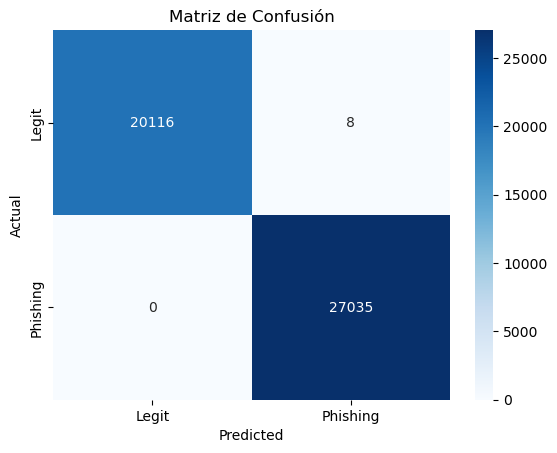

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

## Guardado del Modelo
Guardamos el modelo entrenado y el escalador para su reutilización.

In [15]:
import joblib

joblib.dump(model, "phishing_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Modelo y escalador guardados.")

Modelo y escalador guardados.
